## <font color=red>Transportation problem</font>

<font color=blue>As an introduction to the Transportation Problem, see "Note on LP and ILP" Chapter 23. Besides the generic mathematical model, also a very basic Gurobi implemention is given. This model can be used <U>with any data</U>, provided the problem is balanced. </font>

From <I>Linear and Integer Optimization</I>, Gerard Sierksma & Yori Zwols, 3$^{ed}$, CRC Press, 2015, below we consider the specific problem instance of the Transportation Problem in Chapter 8.2.1, page 345. This mathematical model is only useful for solving this particulair problem instance.

A truck rental company has three depots, labeled 1, 2, 3, at which a total of 8, 5, and 6 vehicles, respectively, are parked. Furthermore, there are five customers, labeled 1, ..., 5, demanding 2, 3, 5, 2, and 7 vehicles, respectively. The transportation costs (per vehicle) from the depots to the customers are listed in table (a) below. The problem is to transport the vehicles from the depots to the customers, making sure that the demand of the customers is satisfied, and in such a way that the total transportation costs are minimized. The figure (b) illustrates the situation by means of a graph.
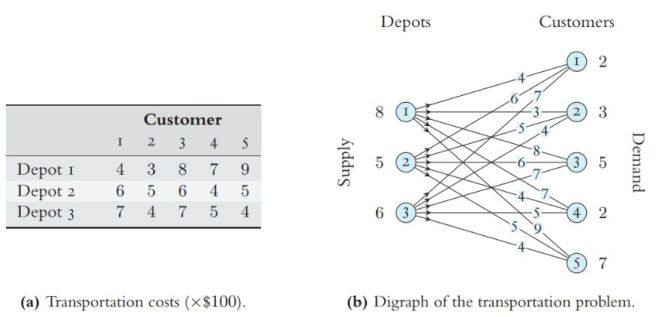

### Formulating the mathematical model:
For $i$ = 1, 2, 3 and $j$ = 1, 2, 3, 4, 5, let $c_{ij}$ be the transportation cost from depot $i$ to customer $j$, and let <font color = red>$x_{ij}$ be the number of vehicles that are to be transported from depot $i$ to customer $j$;</font> the cost of transporting $x_{ij}$ vehicles from $i$ to $j$ is therefore $c_{ij}x_{ij}$. Moreover, let $a_i$ be the number of vehicles in depot $i$ (the supply). Hence, $a_1$ = 8, $a_2$ = 5, $a_3$ = 6. Let $b_j$ be the number of vehicles ordered by customer $j$ (the demand). Hence, $b_1$ = 2, $b_2$ = 3, $b_3$ = 5, $b_4$ = 2, $b_5$ = 7. Note that the problem is <B><font color = red>balanced</font></B> and can formulated as an ILO-model as follows:

min z = $4x_{11} +3x_{12} +8x_{13} +7x_{14} +9x_{15} $<BR>
&emsp; &emsp; $+6x_{21} +5x_{22} +6x_{23}+ 4x_{24} +5x_{25} $<BR>
&emsp; &emsp; $+7x_{31} +4x_{32} +7x_{33} +5x_{34} +4x_{35}$ <BR>
s.t. $ x_{11} +x_{12} +x_{13} +x_{14} +x_{15} = 8$<BR>
&emsp; $x_{21} +x_{22} +x_{23} +x_{24} +x_{25} = 5 $<BR>
&emsp; $x_{31} +x_{32} +x_{33} +x_{34} +x_{35} = 6$<BR>
&emsp; $x_{11}+x_{21}+x_{31} = 2$<BR>
&emsp; $x_{12}+x_{22}+x_{32} = 3$<BR>
&emsp; $x_{13}+x_{23}+x_{33} = 5$<BR>
&emsp; $x_{14}+x_{24}+x_{34} = 2$<BR>
&emsp; $x_{15}+x_{25}+x_{35} = 7$<BR> 
&emsp; $x_{11}, ..., x_{35} ≥ 0$, and integer.

### <font color=blue>Implementation in Python:
<font color=blue>Below, we give the generic model from the "Note on LP and ILP" with some additional lines to avoid using it with the wrong (unbalanced) data.

In [1]:
from gurobipy import *

def TransportationModel(supply, demand, cost):

    depots    = range(len(supply))         # Indices for the depots
    customers = range(len(demand))         # Indices for the customers

    if sum(supply) < sum(demand):
        print("Not balanced: supply (", sum(supply), ") < demand (", sum(demand), ")")
        return Model()                                                             # Unbalanced problems are not solved
    elif sum(supply) > sum(demand):
        print("Not balanced: supply (", sum(supply), ") > demand (", sum(demand), ")")
        return Model()                                                             # Unbalanced problems are not solved
    
    m = Model("Transportation Problem")
    x = m.addVars(depots, customers, name = "Flow")          # no need to define as INTEGERs (see week 3)
    
    m.setObjective( quicksum(cost[i,j]*x[i,j] for i in depots for j in customers), GRB.MINIMIZE)
    # m.setObjective( x.prod(cost) , GRB.MINIMIZE)               requires dictionaries
    m.addConstrs( (x.sum(i, "*") == supply[i] for i in depots)   , 'Supply')
    m.addConstrs( (x.sum("*", j) == demand[j] for j in customers), 'Demand')
    m.update()
         
    return m

## <font color=red>1) Use the model to solve the problem instance from the textbook:

In [2]:
import numpy as np

m = 3                                                                            # A small problem instance
n = 5
a = [8, 5, 6]                                                                    # Parameter a: supply
b = [2, 3, 5, 2, 7]                                                              # Parameter b: demand
c = np.array([ [4, 3, 8, 7, 9], [6, 5, 6, 4, 5], [7, 4, 7, 5, 4] ])              # Parameter c: unit cost matrix

TP = TransportationModel(a, b, c)
TP.Params.LogToConsole = 0
print(f'Model has {TP.NumVars} variables, {TP.NumConstrs} constraints and {TP.NumNZs} nonzeros\n')

TP.optimize()

status = TP.Status
if status != GRB.OPTIMAL:
    print(f"Optimization was stopped with status {status}")
else:
    print(f"The optimal objective is {TP.ObjVal:g}")
    print("\nVarName           |   value      c_ij    red.cost") 
    for var in TP.getVars():
        if var.x > 0.5:
            print(f"{var.VarName:17} |{var.X:8.3f}  {var.obj:8.2f}   {var.rc:8.2f}")
    print("\nConstrName        |     RHS     Slack         Pi") 
    for cons in TP.getConstrs():
        print(f"{cons.ConstrName:17} |{cons.rhs:8.2f}  {cons.Slack:8.2f}   {cons.pi:8.2f}") 

Set parameter Username
Set parameter LicenseID to value 2766413
Academic license - for non-commercial use only - expires 2027-01-15
Set parameter LogToConsole to value 0
Model has 15 variables, 8 constraints and 30 nonzeros

The optimal objective is 90

VarName           |   value      c_ij    red.cost
Flow[0,0]         |   2.000      4.00       0.00
Flow[0,1]         |   3.000      3.00       0.00
Flow[0,2]         |   3.000      8.00       0.00
Flow[1,2]         |   2.000      6.00       0.00
Flow[1,3]         |   2.000      4.00       0.00
Flow[1,4]         |   1.000      5.00       0.00
Flow[2,4]         |   6.000      4.00       0.00

ConstrName        |     RHS     Slack         Pi
Supply[0]         |    8.00      0.00       2.00
Supply[1]         |    5.00      0.00       0.00
Supply[2]         |    6.00      0.00      -1.00
Demand[0]         |    2.00      0.00       2.00
Demand[1]         |    3.00      0.00       1.00
Demand[2]         |    5.00      0.00       6.00
Demand[3]

## <font color=red>2) Check some properties of the solution

Try to answer the following questions for the problem solved above. It requires to write a few line of code.

Q1: The reduced cost for basic variables are 0, as is confirmed by the output above. List the reduced cost for non-basic variables. Are they all non-negative? Are there any reduced cost equal to 0? <BR>

Q2: The shadow prices for the demand and supply are stored in the "Pi" attribute for the constraints. Show that selling all "resources", i.e. all the RHS's, for a price equal to the shadow prices lead to a revenue of 90.

In [3]:
import numpy as np
from itertools import product

# Extract the primal solution x
x = np.array([var.x for var in TP.getVars()]).reshape(m,n)
print(x)

# Extract the dual solution u and v
pi_sup, pi_dem = np.array([cons.pi for cons in TP.getConstrs()][0:m]), np.array([cons.pi for cons in TP.getConstrs()][m:m+n])
print(pi_sup, pi_dem)






[[2. 3. 3. 0. 0.]
 [0. 0. 2. 2. 1.]
 [0. 0. 0. 0. 6.]]
[ 2.  0. -1.] [2. 1. 6. 4. 5.]


Q1

In [4]:
nonbasic = [(v.VarName, v.RC, v.X) for v in TP.getVars() if abs(v.X) < 1e-9]
nonbasic_sorted = sorted(nonbasic, key=lambda t: t[1])

print("Non-basic variables (X ~ 0):", len(nonbasic_sorted))
for name, rc, xval in nonbasic_sorted:
    print(name, rc)

rc_vals = [rc for _, rc, _ in nonbasic_sorted]
print("All non-negative:", all(rc >= -1e-9 for rc in rc_vals))
print("Any reduced cost ~ 0:", any(abs(rc) < 1e-9 for rc in rc_vals))

Non-basic variables (X ~ 0): 8
Flow[0,3] 1.0
Flow[0,4] 2.0
Flow[2,2] 2.0
Flow[2,3] 2.0
Flow[1,0] 4.0
Flow[1,1] 4.0
Flow[2,1] 4.0
Flow[2,0] 6.0
All non-negative: True
Any reduced cost ~ 0: False


Q2

In [5]:
constrs = TP.getConstrs()
rhs = [c.RHS for c in constrs]
pi = [c.Pi for c in constrs]
revenue = sum(r*p for r, p in zip(rhs, pi))
print("Revenue:", revenue)

Revenue: 90.0
